## Bar plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib Version : ', mpl.__version__)

Matplotlib Version :  3.3.3


### 실습간 사용데이터
- Student Score Dataset (1000명의 학생 데이터)
- feature
    - 성별 : female / male
    - 인종,민족 : group A,B,C,D,E
    - 부모님 최종학력 : 고등학교 졸업, 전문대, 학사, 석사, 2년제
    - 점심 : standard와 free/reduced
    - 시험 예습 : none / completed
    - 수학,읽기 쓰기 성적 (0~100)

In [6]:
student = pd.read_csv('data/studentsPerformance.csv')
student.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [8]:
# gender별 각 인종 그룹의 수
group = student.groupby('gender')['race/ethnicity'].value_counts().sort_index()
group

gender  race/ethnicity
female  group A            36
        group B           104
        group C           180
        group D           129
        group E            69
male    group A            53
        group B            86
        group C           139
        group D           133
        group E            71
Name: race/ethnicity, dtype: int64

### 1. 기본 Bar Plot
- bar() : 기본적인 bar plot
- barh() : horizontal bar plot

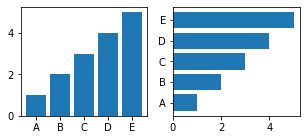

In [4]:
# figure 생성 및 ax를 subplot 2개 짜리로 만듬.
fig, axes = plt.subplots(1, 2, figsize=(5,2))

x = list('ABCDE')
y = np.array([1,2,3,4,5])

axes[0].bar(x,y)
axes[1].barh(x,y)

plt.show()

### 2. Multiple Bar Plot
- 분포가 다른데 같게 보이는 문제 -> scale을 맞춰주는 방법 필요
- scale 맞춰주는 방법
    - sharey=True
    - 반복문으로 set_ylim

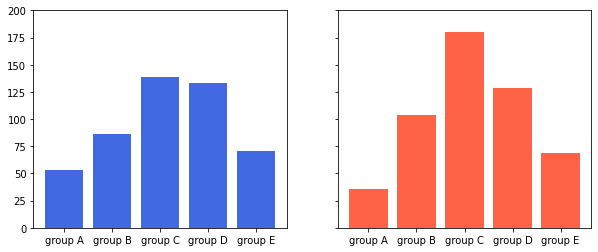

In [12]:
# figure 생성 및 ax를 subplot 2개 짜리로 만듬.
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True) # scale 방법1 : sharey
axes[0].bar(group['male'].index, group['male'], color='royalblue')
axes[1].bar(group['female'].index, group['female'], color='tomato')

# scale 방법2
for ax in axes:
    ax.set_ylim(0,200)
plt.show()

### 3. Stacked Bar Plot
- 쌓아서 보는 방법으로 비율 비교하기 좋음.
- 주황색 (위에 올려져 있는 것들 끼리는 비교하기가 어려운 문제 존재)

<hr>

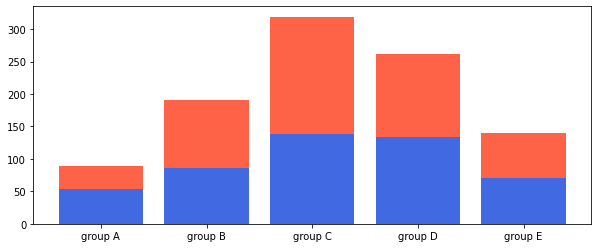

In [19]:
# figure 생성 및 ax를 subplot 2개 짜리로 만듬.
fig, axes = plt.subplots(1, 1, figsize=(10,4), sharey=True) # scale 방법1 : sharey
axes.bar(group['male'].index, group['male'], color='royalblue')
axes.bar(group['female'].index, group['female'],bottom=group['male'], color='tomato')

plt.show()

### 4. Percentage Stacked Bar Plot
- 3번에서 좀더 업그레이드 한 방법
- 전체 비율을 1로 하여 비교

<hr>

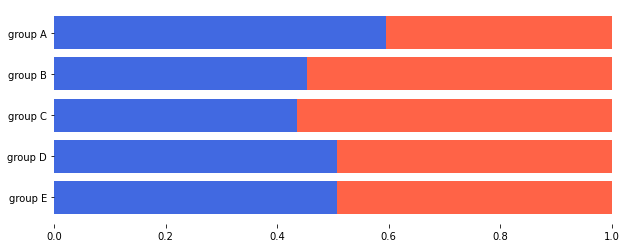

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(10,4)) # scale 방법1 : sharey

group = group.sort_index(ascending=False) # 역순 정렬 
total = group['male'] + group['female']

axes.barh(group['male'].index, group['male']/total, 
          color='royalblue')
axes.barh(group['female'].index, group['female']/total, 
          left=group['male']/total, color='tomato')

# (0, 1)로 범위 조정
axes.set_xlim(0,1)

# 선 테두리 삭제
for s in ['top', 'bottom', 'left','right']:
    axes.spines[s].set_visible(False)

plt.show()

### 5. Grouped Bar Plot (Seaborn이 잘되있음)
- 3가지 방법으로 구현 가능
    - x축 조정
    - width 조정
    - xticks, xtickslabels